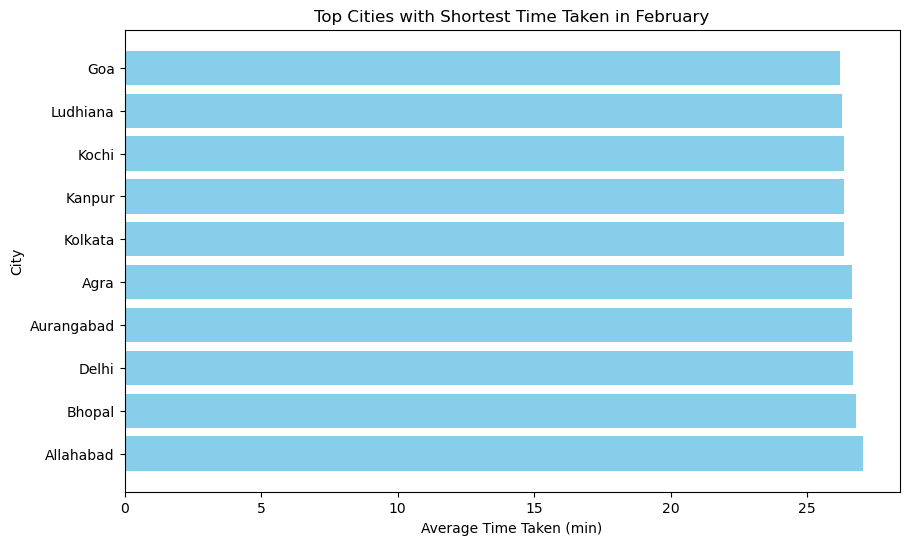

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

# load dataframe
data=pd.read_csv('zomato_predicted1.csv')
df = pd.DataFrame(data)

# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract month from Order_Date
df['Month'] = df['Order_Date'].dt.month

def top_cities_by_time_taken(df, month, n=10):
    """
    Function to get the top N cities with the shortest time taken for a given month.
    
    Parameters:
    - df: DataFrame containing order dates, cities, and time taken.
    - month: The month for which to filter the data.
    - n: Number of top cities to return. Default is 10.
    
    Returns:
    - DataFrame containing the top N cities with the shortest time taken for the given month.
    """
    # Filter data for the specified month
    month_data = df[df['Month'] == 2]
    
    # Group data by city and calculate average time taken
    average_data = month_data.groupby('City_Name')['Time_taken (min)'].mean().reset_index()
    
    # Sort data by Time_taken (min) in ascending order
    sorted_data = average_data.sort_values(by='Time_taken (min)', ascending=True)
    
    # Get the top N cities
    top_cities = sorted_data.head(n)
    
    return top_cities

def plot_top_cities(top_cities_df, month):
    """
    Function to plot the top cities with the shortest time taken for a given month.
    
    Parameters:
    - top_cities_df: DataFrame containing the top cities with the shortest time taken.
    - month: The month for which the data is plotted.
    """
    plt.figure(figsize=(10, 6))
    plt.barh(top_cities_df['City_Name'], top_cities_df['Time_taken (min)'], color='skyblue')
    plt.xlabel('Average Time Taken (min)')
    plt.ylabel('City')
    plt.title(f'Top Cities with Shortest Time Taken in {calendar.month_name[month]}')
    plt.gca().invert_yaxis()  # Invert y-axis to show the city with the shortest time at the top
    plt.show()


top_cities_month = top_cities_by_time_taken(df, month=2, n=10)
plot_top_cities(top_cities_month, month=2)


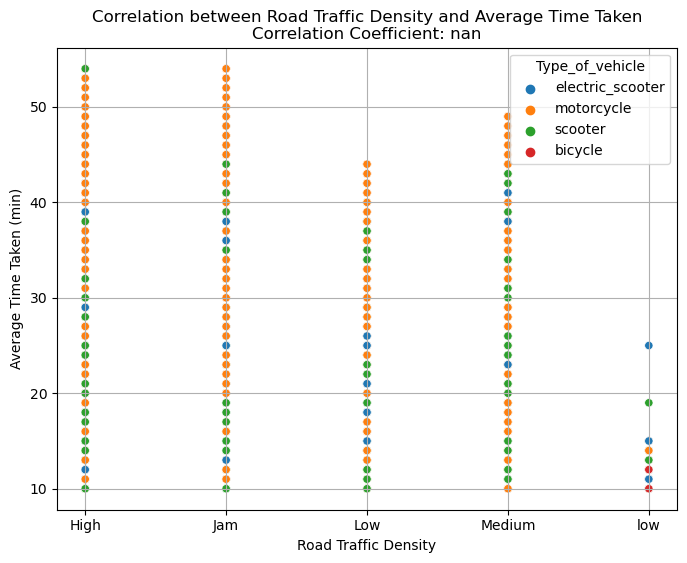

In [41]:

average_time_taken = df.groupby('City_Name')['Time_taken (min)'].mean()

correlation = df['Road_traffic_density'].corr(average_time_taken)
df_sorted = df.sort_values(by='Road_traffic_density')

# Visualize correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Road_traffic_density', y='Time_taken (min)', data=df_sorted, hue='Type_of_vehicle')
plt.title(f'Correlation between Road Traffic Density and Average Time Taken\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (min)')
plt.grid(True)
plt.show()

In [46]:
label_mapping = {0: 'Fair', 1: 'Good', 2: 'Excellent', 3: 'Poor'}
df['Vehicle_condition_label'] = df['Vehicle_condition'].replace(label_mapping)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   City_Name                    45584 non-null  object        
 3   Delivery_person_Age          45584 non-null  float64       
 4   Delivery_person_Ratings      45584 non-null  float64       
 5   Restaurant_latitude          45584 non-null  float64       
 6   Restaurant_longitude         45584 non-null  float64       
 7   Delivery_location_latitude   45584 non-null  float64       
 8   Delivery_location_longitude  45584 non-null  float64       
 9   Order_Date                   45584 non-null  datetime64[ns]
 10  Time_Orderd                  45584 non-null  object        
 11  Time_Order_picked            45584 non-nu

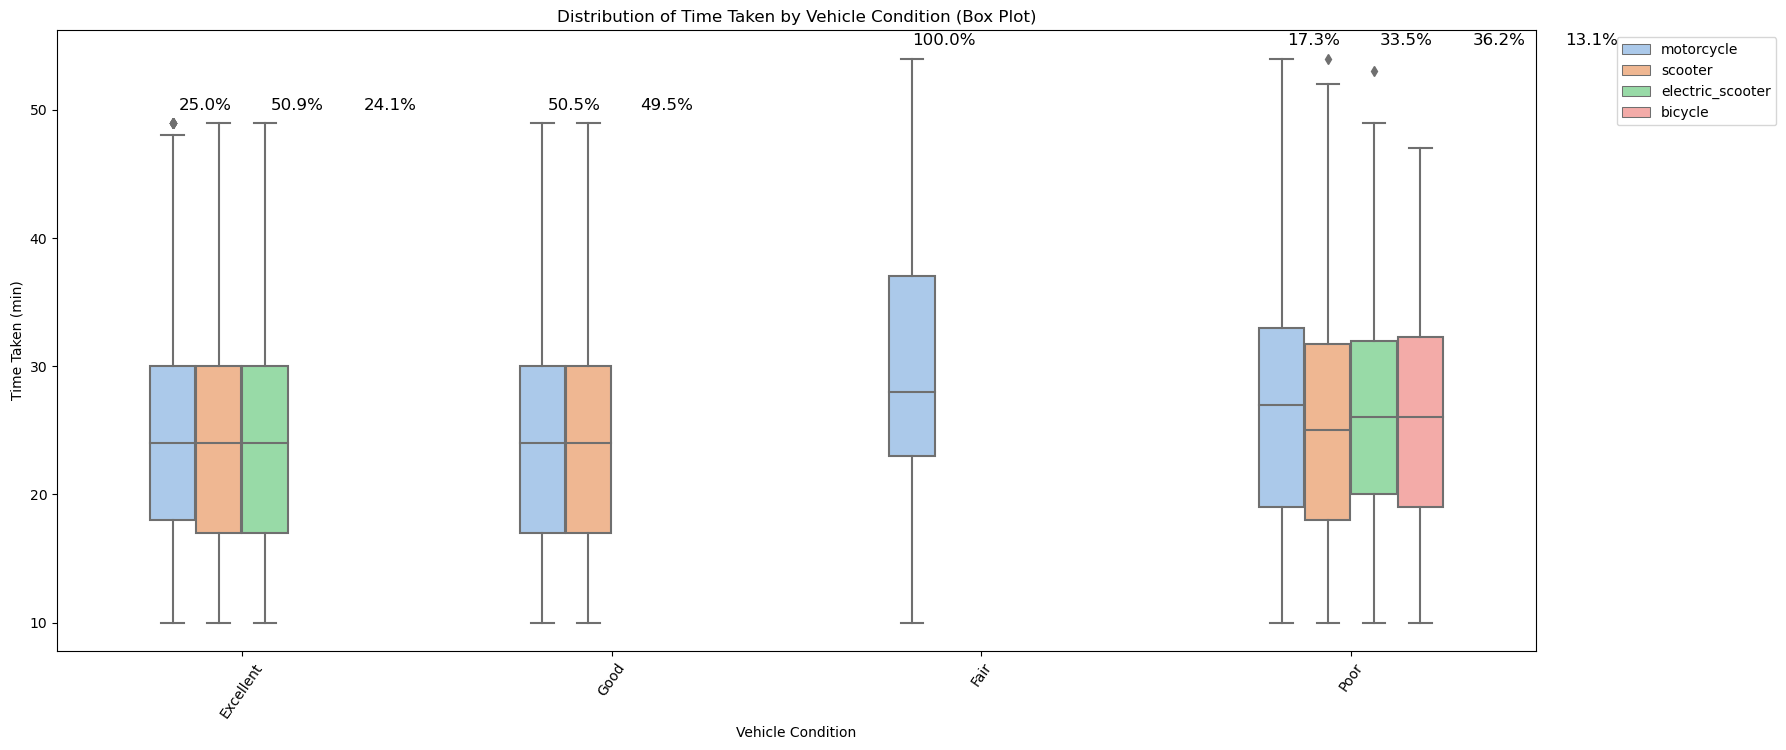

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace with your actual DataFrame)
# For example, if 'df' is your DataFrame with columns 'Vehicle_condition_label', 'Time_taken (min)', and 'Type_of_vehicle'

# Convert numeric labels to categorical labels
label_mapping = {0: 'Fair', 1: 'Good', 2: 'Excellent', 3: 'Poor'}
df['Vehicle_condition_label'] = df['Vehicle_condition_label'].replace(label_mapping)

# Calculate the percentage of Type_of_vehicles for each category of Vehicle_condition_label
percentage_type = df.groupby(['Vehicle_condition_label', 'Type_of_vehicle']).size() / df.groupby('Vehicle_condition_label').size()
percentage_type = percentage_type.reset_index(name='Percentage')

# Plotting visually appealing plots
plt.figure(figsize=(20, 8))

# Box plot
sns.boxplot(x='Vehicle_condition_label', y='Time_taken (min)', data=df, hue='Type_of_vehicle', palette='pastel',width=0.5)
plt.title('Distribution of Time Taken by Vehicle Condition (Box Plot)')
plt.xlabel('Vehicle Condition')
plt.ylabel('Time Taken (min)')
plt.xticks(rotation=55)

# Annotate box plot with percentage values
for i, category in enumerate(df['Vehicle_condition_label'].unique()):
    total_max = df[df['Vehicle_condition_label'] == category]['Time_taken (min)'].max()
    for j, vehicle_type in enumerate(df['Type_of_vehicle'].unique()):
        perc_df = percentage_type[(percentage_type['Vehicle_condition_label'] == category) & (percentage_type['Type_of_vehicle'] == vehicle_type)]
        if not perc_df.empty:
            perc = perc_df['Percentage'].values[0]
            plt.text(i + j * 0.25 - 0.1, total_max + total_max * 0.02, f'{perc * 100:.1f}%', fontsize=12, ha='center')

# Move legend box outside the box plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()
